In [60]:
from BLOCH_beamline import *

data_folder = Path('Data')

%matplotlib inline
font = {'size'   : 14}
matplotlib.rc('font', **font)

In [62]:
HDF5info(data_folder/"19.02.011.HPOL_gap_M1pitchD.h5")


Data/19.02.011.HPOL_gap_M1pitchD.h5 contains 8 scans:
(I am stripping off the 'entry' part of their name)


Scan index	 # datasets 	 # points in first dataset
----------------------------------------------------------
304		12		99
305		12		99
306		12		99
307		12		99
308		12		99
309		12		99
310		12		99
311		12		34


In [63]:
HDF5scaninfo(data_folder/"19.02.011.HPOL_gap_M1pitch.h5",298)

entry298 contains 12 datasets:

	 EPU_R1_110_GAPposition
	 EPU_R1_110_PHASEposition
	 Pt_No
	 b110a_ctl_em02_ch01
	 b110a_ctl_em02_ch03
	 b110a_ctl_em02_timer
	 dt
	 dummytimer_ct
	 m1_pitch
	 m1_pitchposition
	 mono_energyposition
	 pre_scan_snapshot


In [23]:
scanSet = []

entries = [n for n in range(298,298+1)]
gaps = [18+n for n in range(len(entries))]


for entryNumber in entries:
    scanSet.append(HDF5loadscan(data_folder/"19.02.011.HPOL_gap_M1pitch.h5",entryNumber))
    scanSet[-1]['meshCurrent'] = [((ii)/10000) for ii in scanSet[-1]['b110a_ctl_em02_ch01']]

dataFile.close()

try: print("entry{0} had gap {1:2.1f}".format(entries[0],scanSet[0]['EPU_R1_110_GAPposition'][-1]))
except: print("entry{0} has unknown gap".format(entries[0]))
try: print("entry{0} had gap {1:2.1f}".format(entries[-1],scanSet[-1]['EPU_R1_110_GAPposition'][-1]))
except: print("entry{0} has unknown gap".format(entries[-1]))

entry298 had gap 18.4
entry298 had gap 18.4


In [46]:
def fitGaussToSet(filename,firstScan,lastScan,showPlots=False):
    optimal_m1_pitch=[]
    monochromatorEnergy=[]
    
    for scanNumber in range(firstScan,lastScan+1,1):
        if showPlots: fig = plt.figure(figsize=(8,8))
            
        scan = HDF5loadscan(filename,scanNumber) 
        
        monochromatorEnergy.append(scan['mono_energyposition'][-1])

        scan['meshCurrent'] = [((ii*1)/1000) for ii in scan['b110a_ctl_em02_ch01']]

        maxCurrent = max(scan['meshCurrent'])
        minCurrent= min(scan['meshCurrent'])
        maxCurrentIndex = scan['meshCurrent'].index(maxCurrent)
        peakMaximum =scan['m1_pitch'][maxCurrentIndex]

        mask = [(ii<(peakMaximum+8)) and (ii>(peakMaximum-8)) for ii in scan['m1_pitch']]        
        current = [element for index,element in enumerate(scan['meshCurrent']) if mask[index]]
        pitch = [element for index,element in enumerate(scan['m1_pitch']) if mask[index]]
        
        
        params = Parameters()

        params.add('amplitude', 	value=maxCurrent, vary=True)
        params.add('width', 	value=10,vary=True)
        params.add('center', 	value=peakMaximum,vary=True)
        params.add('offset', 	value=minCurrent,vary=True)

        out = minimize(residual, params,args=(pitch, current),method='leastsq')

        fittedCurve=Gauss(out.params,pitch)
        if showPlots: print("position=",out.params['center'].value)
        
        optimal_m1_pitch.append(out.params['center'].value)
  
        if showPlots: 
            plt.plot(scan['m1_pitch'],scan['meshCurrent'],label='Measurement')
            plt.plot(pitch,fittedCurve,label='Gaussian fit')
            plt.legend()
            plt.show()      
        
    return optimal_m1_pitch,monochromatorEnergy

position= -1873.0767255582055


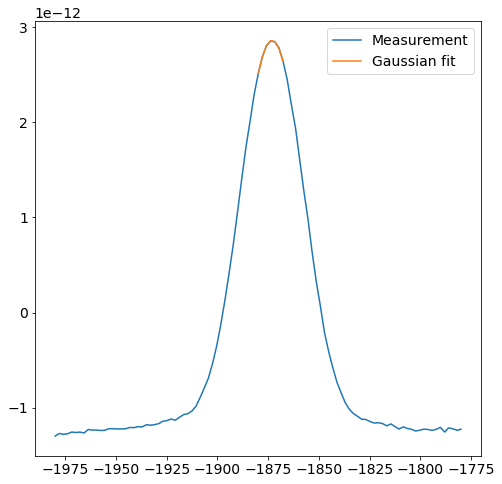

position= -1880.2877183955231


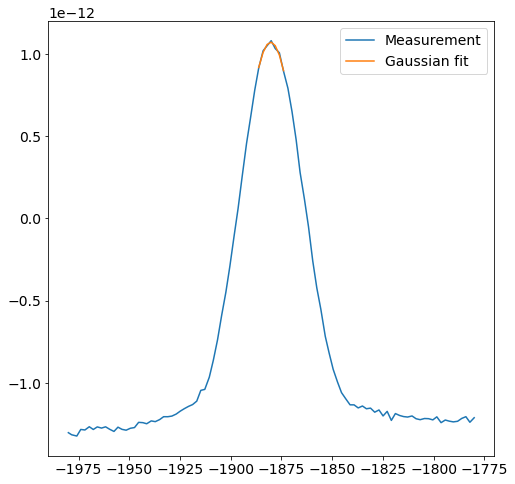

position= -1886.8910937861126


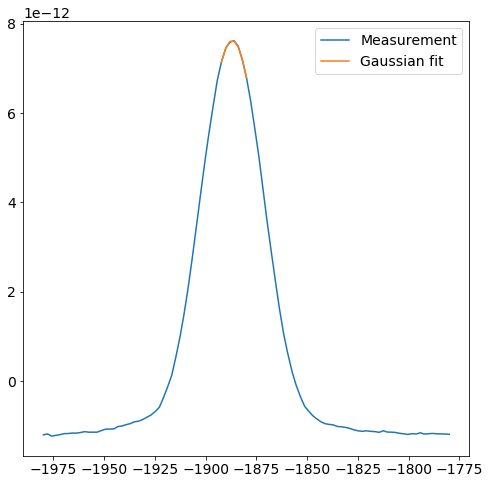

position= -1892.1059589906636


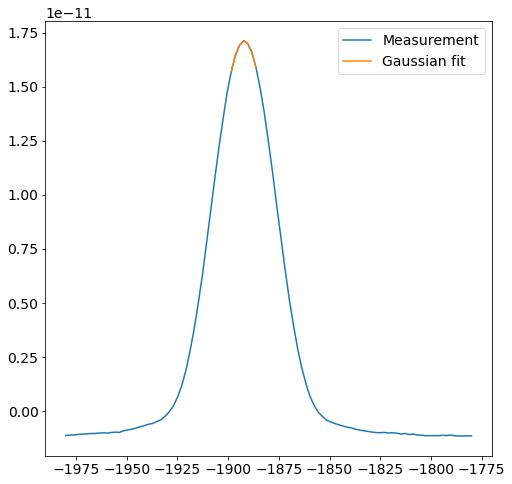

position= -1885.1277745719472


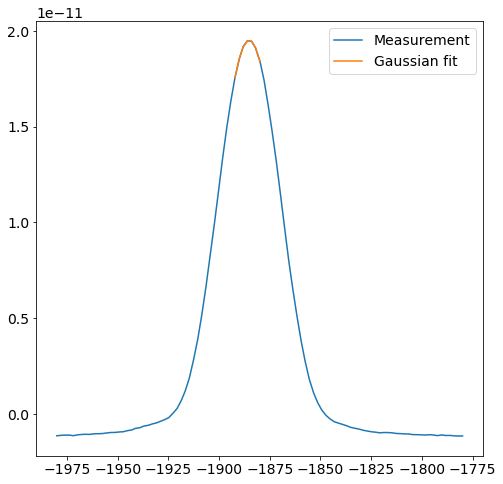

position= -1876.7712754345887


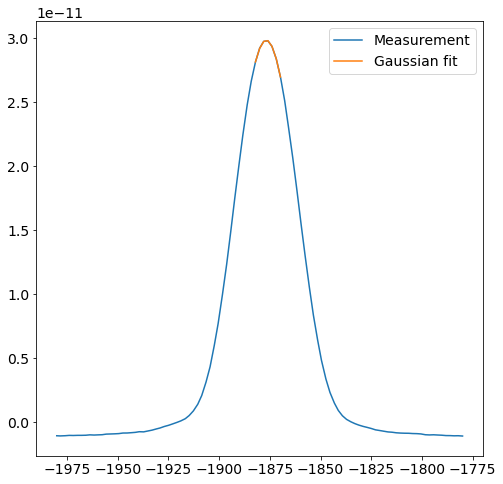

position= -1864.5240328995162


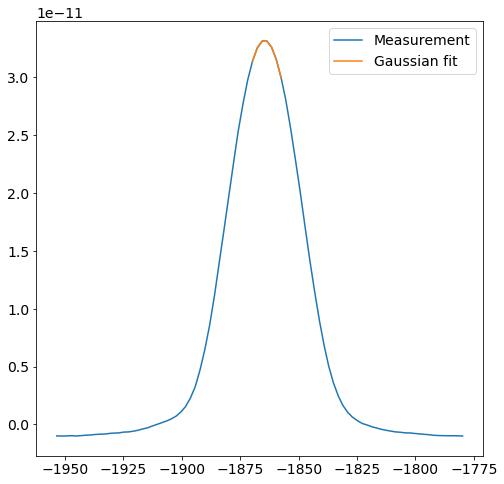

In [49]:
first_order_optimal_m1_pitch,mono_energy=fitGaussToSet(data_folder/"19.02.011.HPOL_gap_M1pitchD.h5",304,310,showPlots=True)

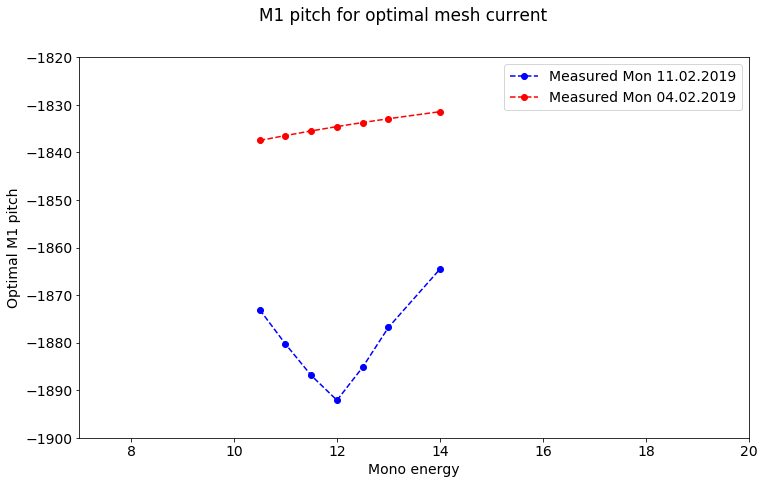

In [64]:
fig=plt.figure(figsize=(12,7))
plt.suptitle('M1 pitch for optimal mesh current')
plt.xlabel("Mono energy")
plt.ylabel("Optimal M1 pitch")
plt.plot(mono_energy,first_order_optimal_m1_pitch,'--bo',label="Measured Mon 11.02.2019")

estimated_pitch=[lookupM1Pitch(hv) for hv in mono_energy]
plt.plot(mono_energy,estimated_pitch,'--ro',label="Measured Mon 04.02.2019")
plt.xlim([7,20])
plt.ylim([-1900,-1820])
plt.legend()
plt.show()

--------------------
Entry number 298
Gap= 18


<IPython.core.display.Javascript object>


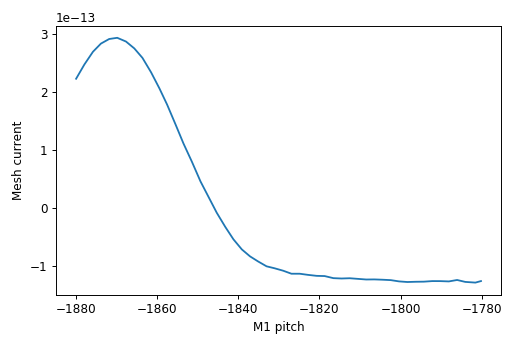

In [25]:
%matplotlib notebook
narrowfirstHarmonicTable = {}
narrowfirstHarmonicTable['gap'] = []
narrowfirstHarmonicTable['hv'] = []
narrowfirstHarmonicTable['flux'] = []

for index,entry in enumerate(entries):
    print("--------------------")
    scan=scanSet[index]
    print("Entry number",entry)
    print("Gap=",gaps[index])
    #pitch = scan['mono_energy'][scan['meshCurrent'].index(max(scan['meshCurrent']))]
    #print("hvmax=",experiment_hv)

    #narrowfirstHarmonicTable['gap'].append(gaps[index])
    #narrowfirstHarmonicTable['hv'].append(experiment_hv)

    fig=plt.figure()
    plt.subplot(111)
    plt.plot(scan['m1_pitch'],scan['meshCurrent'])
    plt.ylabel('Mesh current')
    plt.xlabel('M1 pitch')

    plt.tight_layout()
    plt.show()


